## Classification de Texte avec Naive Bayes


In [1]:
# Importations des bibliothèques nécessaires

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import re
import nltk
from collections import Counter





In [2]:
# Téléchargement des ressources NLTK nécessaires
try: 
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
    


In [3]:
# Importation des données de stopwords 
from nltk.corpus import stopwords

In [4]:
print('\n Preparation du  dataset')
print("-"*50)


 Preparation du  dataset
--------------------------------------------------


### Préparation des datasets

In [5]:
critiques_positives = [
    "Le film de Harry Potter est vraiment très intéressant", 
    "Ce film est absolument fantastique",
    "J'ai adoré ce film, il est incroyable",
    "Un chef-d'œuvre du cinéma moderne",
    "Une performance exceptionnelle des acteurs",
    "Une histoire captivante et bien racontée",
    "Des effets spéciaux époustouflants",
    "Une bande sonore magnifique qui complète parfaitement le film",
    "Un film qui m'a profondément touché",
    "Une réalisation brillante et une direction artistique impeccable",
    "Un film qui m'a fait rire aux éclats",
    "Une intrigue pleine de suspense qui m'a tenu en haleine du début à la fin",
    "Des personnages bien développés et attachants",
    "Un film qui m'a fait réfléchir sur des questions importantes",
    "Une atmosphère immersive qui m'a transporté dans un autre monde",
    "Un film qui m'a ému aux larmes",
    "Une comédie hilarante qui m'a fait oublier mes soucis",
    "Un film d'action palpitant avec des scènes de combat impressionnantes",
    "Une romance touchante qui m'a fait croire à l'amour véritable",
    "Un film d'animation magnifique avec des visuels époustouflants"
    
]

In [6]:
critiques_negatives = [
    "Ce film est ennuyeux et prévisible",
    "Je n'ai pas du tout aimé ce film, il était terrible",
    "Un échec total du cinéma moderne",
    "Une performance médiocre des acteurs",
    "Une histoire mal racontée et peu captivante",
    "Des effets spéciaux décevants",
    "Une bande sonore qui ne correspondait pas du tout au film",
    "Un film qui m'a profondément ennuyé",
    "Une réalisation bâclée et une direction artistique douteuse",
    "Un film qui m'a fait pleurer de frustration",
    "Une intrigue confuse qui m'a perdu dès le début",
    "Des personnages mal développés et peu attachants",
    "Un film qui m'a fait perdre mon temps",
    "Une atmosphère terne qui ne m'a pas du tout transporté",
    "Un film qui m'a laissé indifférent",
    "Une comédie ratée qui n'a pas réussi à me faire sourire",
    "Un film d'action ennuyeux avec des scènes de combat peu impressionnantes",
    "Une romance clichée qui m'a fait douter de l'amour véritable",
    "Un film d'animation décevant avec des visuels peu inspirés"
]

In [8]:
# Création du DataFrame
data = []

# ajout des critiques positives
for review in critiques_positives:
    data.append({'review': review, 'sentiment': 1, 'label': 'positive'})

# ajout des critiques négatives
for review in critiques_negatives:
    data.append({'review': review, 'sentiment': 0, 'label': 'negative'})

# Création du DataFrame
df = pd.DataFrame(data)
print(f"Nombre total de critiques : {len(df)}")
print("Distribution des classes :")
print(df['label'].value_counts())

# Préprocessing des textes
print('\n Preprocessing des textes')
print("-"*50)
def preprocess_text(text):
    """Fonction de prétraitement du texte  """
    # Conversion en minuscules
    text = text.lower()
    # Suppression des caractères spéciaux et des chiffres
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Suppression des espaces supplémentaires
    text = re.sub(r'\s+', ' ', text).strip()
    return text
# Application du prétraitement
df['text_processed'] = df['review'].apply(preprocess_text)

# Exemple de texte avant et après prétraitement
print("\nExemple de texte avant et après prétraitement :")
print("Avant :", df['review'].iloc[0])
print("Après :", df['text_processed'].iloc[0])



Nombre total de critiques : 39
Distribution des classes :
label
positive    20
negative    19
Name: count, dtype: int64

 Preprocessing des textes
--------------------------------------------------

Exemple de texte avant et après prétraitement :
Avant : Le film de Harry Potter est vraiment très intéressant
Après : le film de harry potter est vraiment trs intressant


### Vectorisation avec TF-IDF

In [9]:
print('\n Vectorisation avec TF-IDF')
print("-"*50)
# Définir les mots vides (stopwords) en français
stop_words_fr = set(stopwords.words('french'))

# Configuration du vectoriseur TF-IDF
vectoriseur = TfidfVectorizer(
    max_features=5000,  # Limite le nombre de caractéristiques
    stop_words=list(stop_words_fr),  # Supprime les mots vides en français
    ngram_range=(1, 2),  # Utilise des unigrammes et des bigrammes
    min_df=1,  # Ignore les termes qui apparaissent dans moins de 1 document
    max_df=0.8  # Ignore les termes qui apparaissent dans plus de 90% des documents
)

# Séparation des données en ensembles d'entraînement et de test
x = df['text_processed']
y = df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y # Assure une répartition équilibrée des classes dans les ensembles
    )                                                # Stratify pour maintenir la proportion des classes
                                                    #random_state pour la reproductibilité des résultats 
                                                    # x, y : les données et les étiquettes
                                                    # test_size : la proportion des données à utiliser pour le test
                                                    
print(f"Nombre de critiques dans l'ensemble d'entraînement : {len(x_train)}")
print(f"Nombre de critiques dans l'ensemble de test : {len(x_test)}")


 Vectorisation avec TF-IDF
--------------------------------------------------
Nombre de critiques dans l'ensemble d'entraînement : 27
Nombre de critiques dans l'ensemble de test : 12


In [10]:
# Vectorisation des données
x_train_tfidf = vectoriseur.fit_transform(x_train)
x_test_tfidf = vectoriseur.transform(x_test)

print(f"Nombre de caractéristiques après vectorisation : {x_train_tfidf.shape}")

Nombre de caractéristiques après vectorisation : (27, 171)


### Afficher les mots les plus importants

In [11]:
# Afficher les mots les plus importants
feature_names = vectoriseur.get_feature_names_out()
print("Exemple de données extraites : {feature_names[:10]}")

Exemple de données extraites : {feature_names[:10]}


### Afficher les mots les plus fréquents dans les critiques positives et négatives

In [12]:
# Afficher les mots les plus fréquents dans les critiques positives et négatives
feature_names = vectoriseur.get_feature_names_out() # Récupère les noms des caractéristiques
tfidf_scores = x_train_tfidf.toarray() # Convertit la matrice sparse en tableau dense
labels = y_train.values # Récupère les étiquettes des critiques d'entraînement
counter_pos = Counter() # Compteur pour les mots dans les critiques positives
counter_neg = Counter() # Compteur pour les mots dans les critiques négatives

for i, label in enumerate(labels): # Parcourt chaque critique et son étiquette
    if label == 1: # Si la critique est positive
        counter_pos.update(dict(zip(feature_names, tfidf_scores[i]))) # Met à jour le compteur des mots positifs
    else: # Si la critique est négative
        counter_neg.update(dict(zip(feature_names, tfidf_scores[i]))) # Met à jour le compteur des mots négatifs

most_common_pos = counter_pos.most_common(10) # Récupère les 10 mots les plus fréquents dans les critiques positives
most_common_neg = counter_neg.most_common(10) # Récupère les 10 mots les plus fréquents dans les critiques négatives

print("\nMots les plus fréquents dans les critiques positives :")
for word, score in most_common_pos: # Affiche chaque mot et son score TF-IDF
    print(f"{word}: {score:.4f}") # Formatage pour afficher 4 décimales

print("\nMots les plus fréquents dans les critiques négatives :") 
for word, score in most_common_neg: # Affiche chaque mot et son score TF-IDF
    print(f"{word}: {score:.4f}") # Formatage pour afficher 4 décimales




Mots les plus fréquents dans les critiques positives :
film: 1.2032
fait: 0.7997
poustouflants: 0.7668
bien: 0.6991
film fait: 0.6459
magnifique: 0.6114
spciaux poustouflants: 0.4904
film mu: 0.4846
larmes: 0.4846
mu: 0.4846

Mots les plus fréquents dans les critiques négatives :
film: 0.9459
peu: 0.7881
ennuyeux: 0.7014
tout: 0.6324
fait: 0.5160
ennuyeux prvisible: 0.4971
film ennuyeux: 0.4971
prvisible: 0.4971
dcevants: 0.4784
spciaux dcevants: 0.4784


### Entrainement du modele NAIVE BAYES

In [13]:
print("Entrainement du modele NAIVE BAYES")
print("-"*50)

# Création et entraînement du modèle Naive Bayes
nb_classifier = MultinomialNB(alpha=1.0) # Utilise le classifieur Naive Bayes multinomial avec un lissage de Laplace (aplha=1.0) => paramètre de lissage pour gérer les mots non vus
nb_classifier.fit(x_train_tfidf, y_train) # Entraîne le modèle sur les données vectorisées d'entraînement et les étiquettes correspondantes
print("Modèle entraîné avec succès.")

Entrainement du modele NAIVE BAYES
--------------------------------------------------
Modèle entraîné avec succès.


In [14]:
# Faire les prédictions sur l'ensemble de test
y_pred = nb_classifier.predict(x_test_tfidf) # Prédictions des étiquettes pour les données de test
y_pred_prob = nb_classifier.predict_proba(x_test_tfidf) # Probabilités associées aux prédictions

### Evaluation du modele

In [15]:
print('\n Evaluation du modele')
print("-"*50)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitude (Accuracy) : {accuracy:.4f}") # Affiche l'exactitude du modèle avec 4 décimales

# Rapport de classification détaillé
report = classification_report(y_test, y_pred, target_names=['negative', 'positive'])
print("\nRapport de classification :\n", report)


 Evaluation du modele
--------------------------------------------------
Exactitude (Accuracy) : 0.3333

Rapport de classification :
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
    positive       0.40      0.67      0.50         6

    accuracy                           0.33        12
   macro avg       0.20      0.33      0.25        12
weighted avg       0.20      0.33      0.25        12



In [16]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred) # Calcule la matrice de confusion
print("Matrice de confusion : ") 
print(conf_matrix)

Matrice de confusion : 
[[0 6]
 [2 4]]


### Analyse des features importants

In [17]:
print('\n Analyse des features importants')
print("-"*50)

# Obteneir les coefficients pour chaque classe 
feature_importances = nb_classifier.feature_log_prob_  # feature_log_prob_ : Probabilités logarithmiques des caractéristiques pour chaque classe
feature_names = vectoriseur.get_feature_names_out() # Récupère les noms des caractéristiques

# Afficher les 10 mots les plus indicatifs pour chaque classe
top_n = 10

# pour la classe positive (1)
top_positive_indices = np.argsort(feature_importances[1])[-top_n:][::-1] # Indices des 10 mots les plus indicatifs pour la classe positive
print(f"\nTop {top_n} mots les plus indicatifs pour la classe positive :")
for idx in top_positive_indices:
    print(f"{feature_names[idx]}: {feature_importances[1][idx]:.4f}") # Affiche chaque mot et son importance

print("\n" + "-"*50)
# pour la classe négative (0)
top_negative_indices = np.argsort(feature_importances[0])[-top_n:][::-1] # Indices des 10 mots les plus indicatifs pour la classe négative
print(f"\nTop {top_n} mots les plus indicatifs pour la classe négative :")
for idx in top_negative_indices:
    print(f"{feature_names[idx]}: {feature_importances[0][idx]:.4f}") # Affiche chaque mot et son importance


 Analyse des features importants
--------------------------------------------------

Top 10 mots les plus indicatifs pour la classe positive :
film: -4.5501
fait: -4.7524
poustouflants: -4.7709
bien: -4.8100
film fait: -4.8417
magnifique: -4.8630
spciaux poustouflants: -4.9410
mu larmes: -4.9449
mu: -4.9449
film mu: -4.9449

--------------------------------------------------

Top 10 mots les plus indicatifs pour la classe négative :
film: -4.6730
peu: -4.7576
ennuyeux: -4.8073
tout: -4.8487
fait: -4.9227
film ennuyeux: -4.9352
ennuyeux prvisible: -4.9352
prvisible: -4.9352
dcevants: -4.9478
spciaux dcevants: -4.9478


### Prédiction des sentiments

In [18]:
print('\n Prédiction des sentiments')
print("-"*50)


 Prédiction des sentiments
--------------------------------------------------


In [19]:
def predict_sentiment(texte, modele, vectoriseur):
    """Fonction pour prédire le sentiment d'un texte donné"""
    texte_preprocessed = preprocess_text(texte) # Prétraitement du texte
    texte_tdidf = vectoriseur.transform([texte_preprocessed]) # Vectorisation du texte prétraité
    prediction = modele.predict(texte_tdidf)[0] # Prédiction de l'étiquette
    prediction_prob = modele.predict_proba(texte_tdidf)[0] # Probabilités associées à la prédiction
    
    sentiment = 'positive' if prediction == 1 else 'negative' # Conversion de l'étiquette en texte
    confidence = max(prediction_prob) # Confiance de la prédiction
    return sentiment, confidence # Retourne le sentiment prédit et la confiance associée

In [20]:
# Tests sur de nouvelles critiques
test_texts = [
    "J'ai adoré ce film, c'était fantastique et captivant!",
    "Ce film était ennuyeux et prévisible, je ne le recommande pas.",
    "Une performance exceptionnelle des acteurs, j'ai été impressionné.",
    "L'intrigue était confuse et les personnages peu développés.",
    "Des effets spéciaux époustouflants, un vrai régal pour les yeux.",
    "Je me suis endormi pendant le film, il n'avait aucun intérêt.", 
    "Un film absolument merveilleux, j'ai été transporté du début à la fin.",
    "Le scénario était faible et les dialogues étaient mal écrits.",
    "Une expérience cinématographique inoubliable, je le recommande vivement.",
    "Les personnages étaient superficiels et l'intrigue manquait de profondeur."
]

In [21]:
# prédictions pour les nouvelles critiques
for text in test_texts:
    sentiment, confidence = predict_sentiment(text, nb_classifier, vectoriseur)
    print(f"Texte : {text}\nSentiment prédit : {sentiment} (Confiance : {confidence:.4f})\n")
    print()

Texte : J'ai adoré ce film, c'était fantastique et captivant!
Sentiment prédit : positive (Confiance : 0.6800)


Texte : Ce film était ennuyeux et prévisible, je ne le recommande pas.
Sentiment prédit : negative (Confiance : 0.6714)


Texte : Une performance exceptionnelle des acteurs, j'ai été impressionné.
Sentiment prédit : positive (Confiance : 0.6683)


Texte : L'intrigue était confuse et les personnages peu développés.
Sentiment prédit : negative (Confiance : 0.5768)


Texte : Des effets spéciaux époustouflants, un vrai régal pour les yeux.
Sentiment prédit : positive (Confiance : 0.6282)


Texte : Je me suis endormi pendant le film, il n'avait aucun intérêt.
Sentiment prédit : positive (Confiance : 0.5491)


Texte : Un film absolument merveilleux, j'ai été transporté du début à la fin.
Sentiment prédit : positive (Confiance : 0.5813)


Texte : Le scénario était faible et les dialogues étaient mal écrits.
Sentiment prédit : negative (Confiance : 0.5831)


Texte : Une expérience c

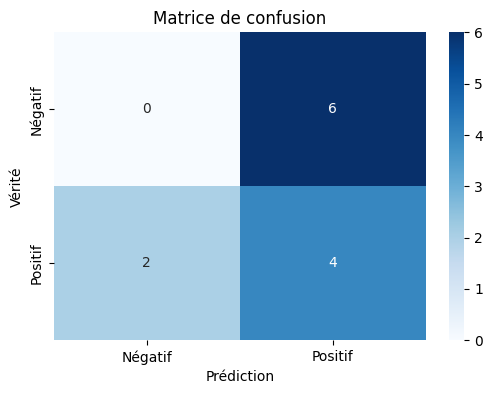

In [22]:
# Matrice de confusion déjà calculée : conf_matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.show()

/tmp/ipykernel_13750/1785125491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette="Greens_r")


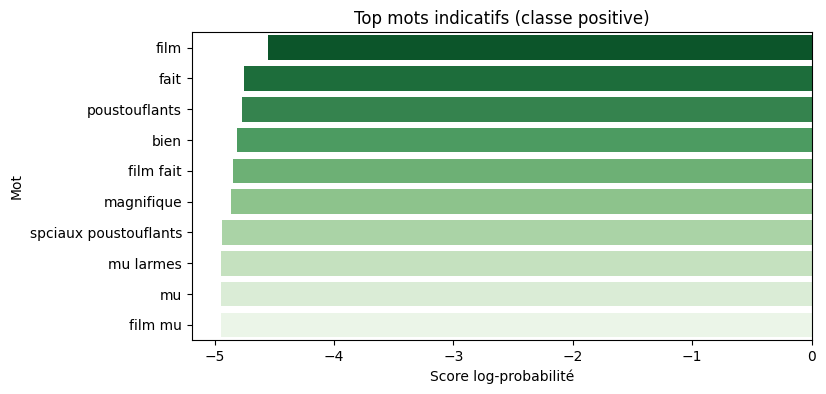

In [23]:
# Pour la classe positive
top_words = [feature_names[idx] for idx in top_positive_indices]
top_scores = [feature_importances[1][idx] for idx in top_positive_indices]

plt.figure(figsize=(8, 4))
sns.barplot(x=top_scores, y=top_words, palette="Greens_r")
plt.title("Top mots indicatifs (classe positive)")
plt.xlabel("Score log-probabilité")
plt.ylabel("Mot")
plt.show()

/tmp/ipykernel_13750/314412988.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette="Greens_r")


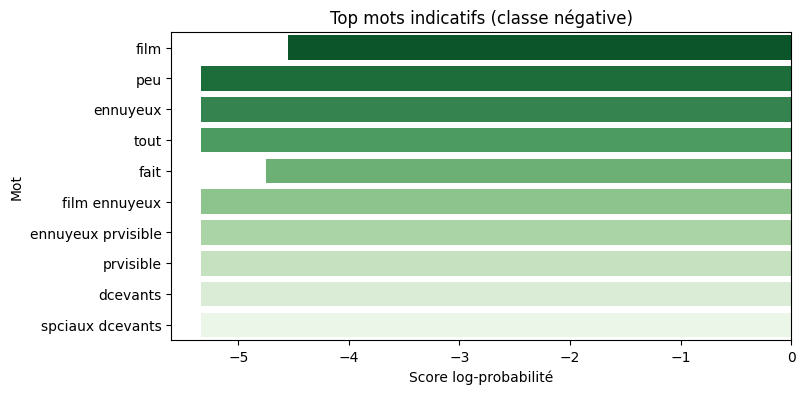

In [27]:
# Pour la classe négative
top_words = [feature_names[idx] for idx in top_negative_indices]
top_scores = [feature_importances[1][idx] for idx in top_negative_indices]

plt.figure(figsize=(8, 4))
sns.barplot(x=top_scores, y=top_words, palette="Greens_r")
plt.title("Top mots indicatifs (classe négative)")
plt.xlabel("Score log-probabilité")
plt.ylabel("Mot")
plt.show()

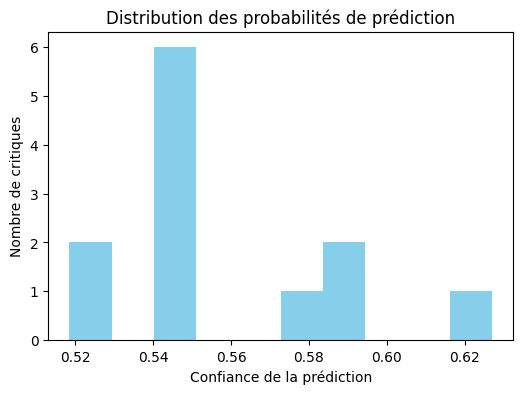

In [24]:
plt.figure(figsize=(6, 4))
plt.hist(y_pred_prob.max(axis=1), bins=10, color='skyblue')
plt.title("Distribution des probabilités de prédiction")
plt.xlabel("Confiance de la prédiction")
plt.ylabel("Nombre de critiques")
plt.show()